<a href="https://colab.research.google.com/github/LindsayJambawo/LindsayJambawo/blob/main/Another_copy_of_Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.Data Preparation**

##**1.1 Import Libraries**


In [ ]:
# prompt: impot all libraries I will need to create an classical IDS using Random Forest, Decision Tree, KNN and SVM

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


##**1.2 Load Data Set**

In [ ]:
# prompt: Code to load the dataset and to show the data type

import pandas as pd
# Load the dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CICIDS2019.csv')

# Display the data types of each column
data.dtypes


<ipython-input-5-48e80cd89028>:5: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CICIDS2019.csv')


,0
Unnamed: 0,int64
Flow ID,object
Source IP,object
Source Port,int64
Destination IP,object
...,...
Idle Std,float64
Idle Max,int64
Idle Min,int64
SimillarHTTP,object


##**1.3 Reduce dataset**

In [ ]:
# prompt: reduce data and use just 10% of it.

# Reduce the dataset to 10% of its original size
data = data.sample(frac=0.1, random_state=42)
data.shape


(104858, 88)

In [ ]:
# prompt: show me columns in the dataset

data.columns


Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Label', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
      

In [ ]:
# prompt: to drop columns

# Drop specified columns
columns_to_drop = [' Total Backward Packets', ' Total Length of Bwd Packets',  ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd Packets/s', ' SYN Flag Count',
       ' RST Flag Count', ' ACK Flag Count', ' URG Flag Count',
       ' CWE Flag Count', ' Down/Up Ratio', ' Avg Bwd Segment Size', 'Active Mean', ' Active Std', ' Active Max',
       ' Active Min', 'Idle Mean']
data = data.drop(columns=columns_to_drop)


#**2. EDA**

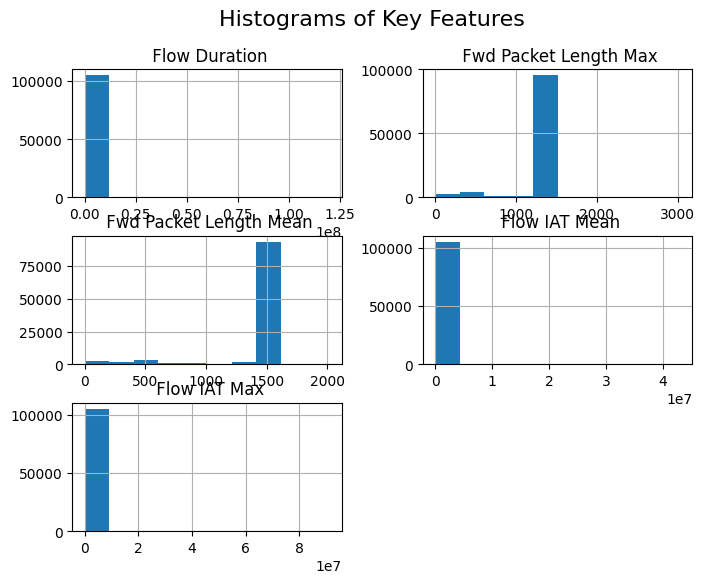

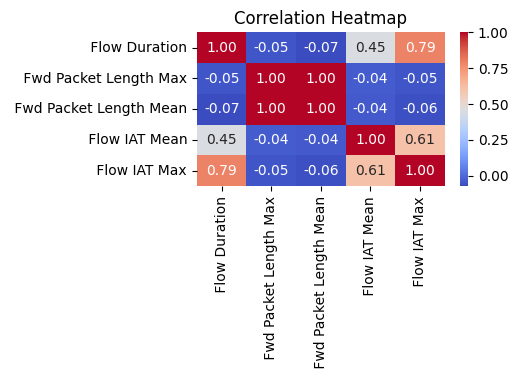

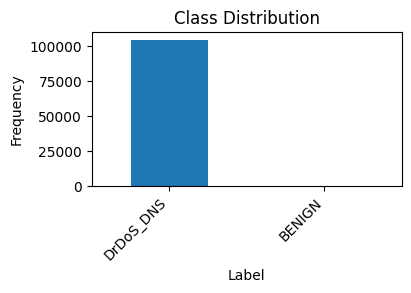

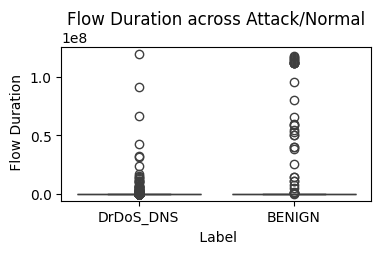

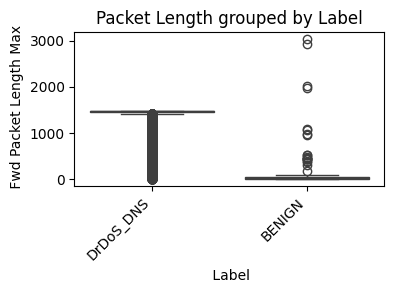

Error converting timestamp, is the column name 'Timestamp' and is it in a datetime format?
'Timestamp' column not found or could not be converted.

Missing Values:
 Unnamed: 0         0
Flow ID            0
 Source IP         0
 Source Port       0
 Destination IP    0
                  ..
 Idle Std          0
 Idle Max          0
 Idle Min          0
SimillarHTTP       0
 Inbound           0
Length: 62, dtype: int64


In [ ]:
# prompt: perform an EDA process and include  these visualizations; histograms for only 5 key features, correlation heatmap with only a few numerical variables for neatness, bar plot for class distribution, Boxplot of Flow Duration across Attack/Normal, Boxplot of Packet Length grouped by Label, time series plot of number of attacks vs timestamp and a few other important things that do not need to use all variables.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for 5 key features
key_features = [' Flow Duration', ' Fwd Packet Length Max', ' Fwd Packet Length Mean', ' Flow IAT Mean', ' Flow IAT Max']
data[key_features].hist(figsize=(8, 6))
plt.suptitle("Histograms of Key Features", fontsize=16)
plt.show()


# Correlation heatmap (subset of numerical variables)
numerical_features = [' Flow Duration', ' Fwd Packet Length Max', ' Fwd Packet Length Mean',' Flow IAT Mean', ' Flow IAT Max']
plt.figure(figsize=(4, 2))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Bar plot for class distribution
plt.figure(figsize=(4, 2))
data[' Label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Boxplot of Flow Duration across Attack/Normal
plt.figure(figsize=(4, 2))
sns.boxplot(x=' Label', y=' Flow Duration', data=data)
plt.title('Flow Duration across Attack/Normal')
plt.show()

# Boxplot of Packet Length grouped by Label
plt.figure(figsize=(4, 2))
sns.boxplot(x=' Label', y= ' Fwd Packet Length Max', data=data)
plt.title('Packet Length grouped by Label')
plt.xticks(rotation=45, ha='right')
plt.show()

# Assuming 'Timestamp' column exists (replace with your actual timestamp column)
# and that attacks are labeled differently from normal traffic.
# You might need to preprocess your timestamp column if it's not datetime format.

#  Try to convert the timestamp column to datetime objects
try:
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])
except (KeyError, ValueError):
  print("Error converting timestamp, is the column name 'Timestamp' and is it in a datetime format?")


#Time Series plot (If Timestamp column is available and processed correctly)
if 'Timestamp' in data:
    attack_counts = data[data['Label'] != 'BENIGN'].groupby('Timestamp').size()
    plt.figure(figsize=(6, 4))
    plt.plot(attack_counts.index, attack_counts.values)
    plt.title("Number of Attacks over Time")
    plt.xlabel("Timestamp")
    plt.ylabel("Number of Attacks")
    plt.show()
else:
  print("'Timestamp' column not found or could not be converted.")

#Additional EDA: Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)
# ... other important EDA aspects (e.g., describe, unique values, etc.)




##**2.1 Dataset Balance**

 Label
DrDoS_DNS    104657
BENIGN          201
Name: count, dtype: int64
 Label
DrDoS_DNS    99.808312
BENIGN        0.191688
Name: count, dtype: float64


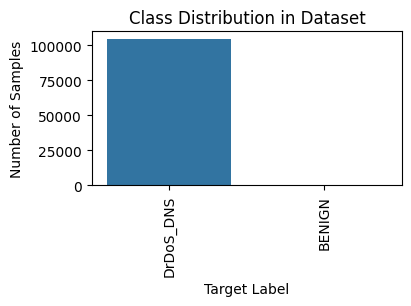

In [ ]:
# prompt: check for dataset balance

import matplotlib.pyplot as plt
# Check class distribution for dataset balance
class_counts = data[' Label'].value_counts()
print(class_counts)

# Calculate and print the percentage of each class
class_percentages = (class_counts / len(data)) * 100
print(class_percentages)

# Visualization of class distribution
plt.figure(figsize=(4, 2))
sns.countplot(x=' Label', data=data)
plt.title('Class Distribution in Dataset')
plt.xlabel('Target Label')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


##**2.2 Balanced Dataset**

 Label
BENIGN       201
DrDoS_DNS    201
Name: count, dtype: int64
 Label
BENIGN       50.0
DrDoS_DNS    50.0
Name: count, dtype: float64


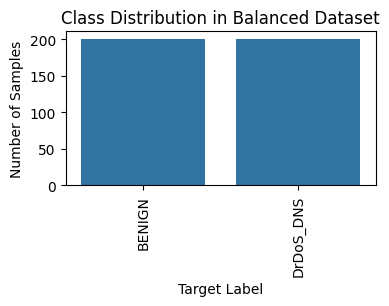

In [ ]:
# prompt: Balance the dataset

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target variable (y)
X = data.drop(' Label', axis=1)
y = data[' Label']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data[' Label'] = y_resampled

# Check the class distribution after balancing
class_counts_balanced = balanced_data[' Label'].value_counts()
print(class_counts_balanced)

# Calculate and print the percentage of each class in the balanced dataset
class_percentages_balanced = (class_counts_balanced / len(balanced_data)) * 100
print(class_percentages_balanced)

# Visualization of class distribution in the balanced dataset
plt.figure(figsize=(4, 2))
sns.countplot(x=' Label', data=balanced_data)
plt.title('Class Distribution in Balanced Dataset')
plt.xlabel('Target Label')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


#**3.Feature Engineering**

##**3.1 Feature Selection**

In [ ]:
# prompt: do simple feature selection

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Assuming 'balanced_data' is your balanced DataFrame
X_balanced = balanced_data.drop(' Label', axis=1)
y_balanced = balanced_data[' Label']

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate through columns and encode object (string) type columns
# Convert mixed-type columns to string before encoding
for col in X_balanced.select_dtypes(include=['object']).columns:
    X_balanced[col] = X_balanced[col].astype(str)  # Convert to string type
    X_balanced[col] = encoder.fit_transform(X_balanced[col])

# Replace infinite values with NaN
X_balanced = X_balanced.replace([np.inf, -np.inf], np.nan)

#Impute missing values using SimpleImputer (replace NaN with mean for numerical features)
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_balanced_imputed = imputer.fit_transform(X_balanced) # Impute missing values in X_balanced

# Initialize SelectKBest with f_classif as the scoring function and k features to select
k = 10  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)

# Fit SelectKBest to the imputed data
X_new = selector.fit_transform(X_balanced_imputed, y_balanced) #This line is crucial

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = list(X_balanced.columns[selected_feature_indices])

print(f"Selected {k} best features: {selected_feature_names}")

# Create a new DataFrame with selected features
X_selected = pd.DataFrame(X_new, columns=selected_feature_names)

# Concatenate with the target variable
selected_data = pd.concat([X_selected, y_balanced], axis=1)

# Now you can use 'selected_data' for training and testing
# ... further code using the selected features


Selected 10 best features: ['Flow ID', ' Source IP', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Min Packet Length', ' Packet Length Mean', ' Average Packet Size', ' Avg Fwd Segment Size', ' Inbound']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [25 26 27 36 37 38 42 43 44 45 46 47] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


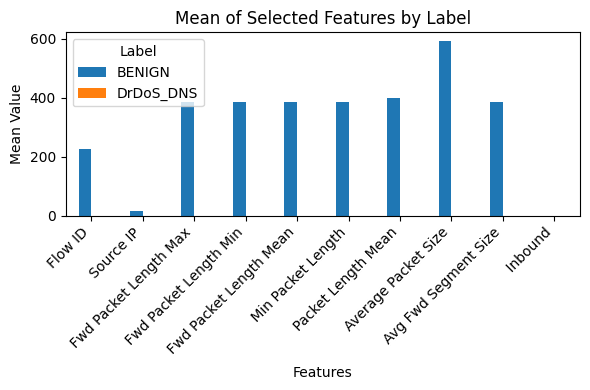

In [ ]:
# prompt: can it be displayed on a graph

import matplotlib.pyplot as plt
# Assuming 'selected_data' is your DataFrame with selected features and target variable

# Group the data by the target variable (' Label') and calculate the mean of the selected features for each group
grouped_data = selected_data.groupby(' Label').mean()

# Transpose the grouped data for easier plotting
grouped_data = grouped_data.T

# Plot the data
grouped_data.plot(kind='bar', figsize=(6, 4))
plt.title('Mean of Selected Features by Label')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.tight_layout()
plt.show()


##**3.2 Target Variable**

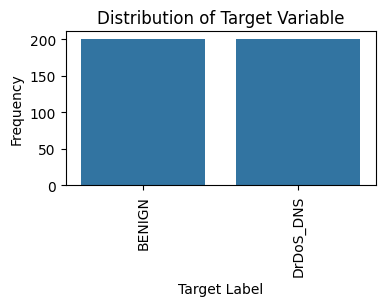

 Label
BENIGN       201
DrDoS_DNS    201
Name: count, dtype: int64


In [ ]:
# prompt: code to show targe variable and display in graph

import matplotlib.pyplot as plt
# Assuming 'y_balanced' is your target variable (from the previous code)

# Visualize the distribution of the target variable
plt.figure(figsize=(4, 2))
sns.countplot(x=y_balanced)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Label')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

# Display value counts of the target variable
print(y_balanced.value_counts())


#**4.Model Training**

In [ ]:
# prompt: train the models showing the evaluation metrics (accuracy, f1 score, precision, recall, roc auc, geometric metrics) in tabular form

import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Assuming X_selected and y_balanced are defined from the previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_balanced, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True, random_state=42) #probability=True for roc_auc_score
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Convert y_test to numerical labels for roc_auc_score
    lb = LabelBinarizer()
    lb.fit(y_train)
    y_test_bin = lb.transform(y_test)
    y_pred_bin = lb.transform(y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    try:
      roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='weighted', multi_class='ovr')
    except ValueError:
      roc_auc = 0 # Handle cases where roc_auc_score cannot be computed

    results.append([name, accuracy, f1, precision, recall, roc_auc])


# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1-Score", "Precision", "Recall", "ROC AUC"])

# Display the results in a tabular format
results_df


,Model,Accuracy,F1-Score,Precision,Recall,ROC AUC
0,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
2,K-Nearest Neighbors,0.962963,0.962906,0.963147,0.962963,0.961111
3,Support Vector Machine,0.950617,0.950449,0.951467,0.950617,0.947222


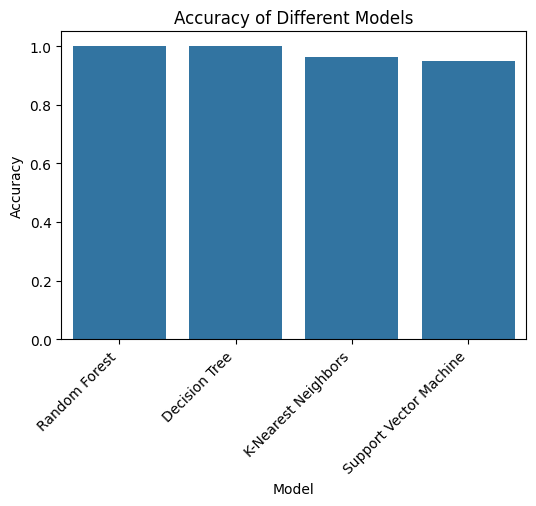

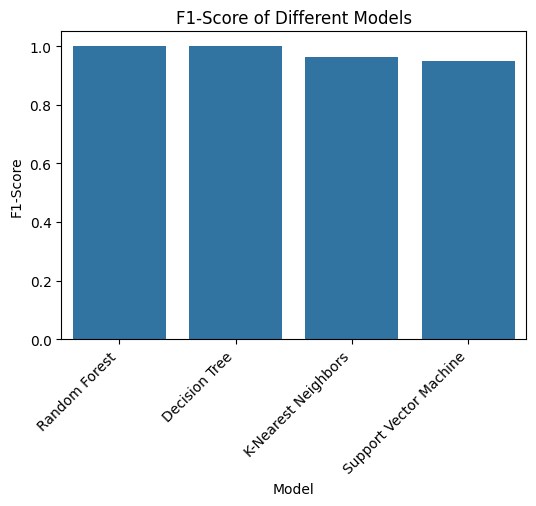

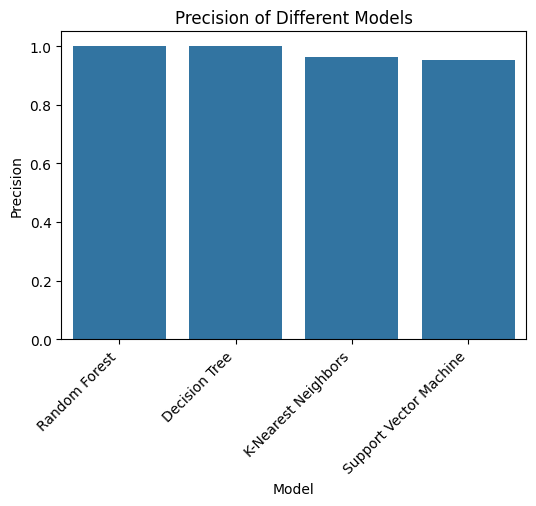

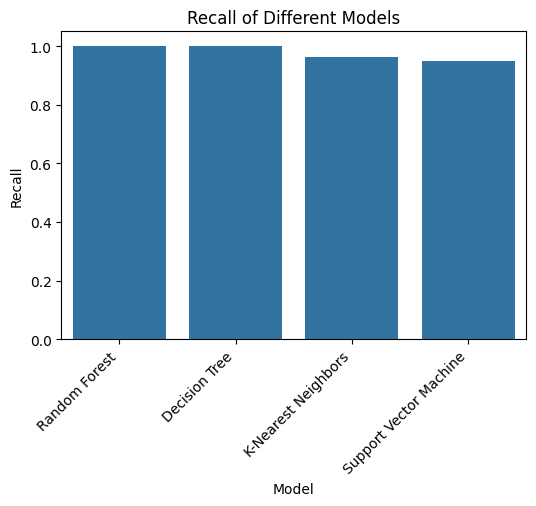

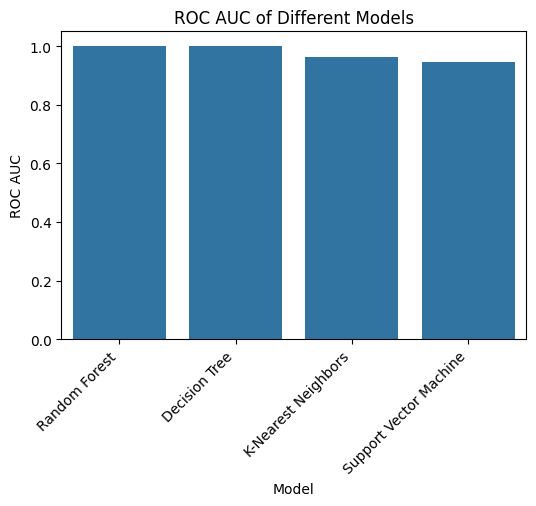

In [ ]:
# prompt: graphical representation for each model

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'results_df' is defined from the previous code

# Bar plot for Accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar plot for F1-Score
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='F1-Score', data=results_df)
plt.title('F1-Score of Different Models')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar plot for Precision
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Precision', data=results_df)
plt.title('Precision of Different Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar plot for Recall
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Recall', data=results_df)
plt.title('Recall of Different Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar plot for ROC AUC
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='ROC AUC', data=results_df)
plt.title('ROC AUC of Different Models')
plt.xlabel('Model')
plt.ylabel('ROC AUC')
plt.xticks(rotation=45, ha='right')
plt.show()


##**4.2 Ensemble Model**

In [ ]:
# prompt: train ensemble model

import pandas as pd
from sklearn.ensemble import VotingClassifier

# Initialize the individual models (same as before)
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()
svm_model = SVC(probability=True, random_state=42)

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('dt', dt_model),
        ('knn', knn_model),
        ('svm', svm_model)
    ],
    voting='soft'  # Use 'soft' voting for probabilistic predictions
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
ensemble_pred = ensemble_model.predict(X_test)


# Evaluate the ensemble model (same as before)
lb = LabelBinarizer()
lb.fit(y_train)
y_test_bin = lb.transform(y_test)
y_pred_bin = lb.transform(ensemble_pred)

ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred, average='weighted')
ensemble_precision = precision_score(y_test, ensemble_pred, average='weighted')
ensemble_recall = recall_score(y_test, ensemble_pred, average='weighted')

try:
    ensemble_roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='weighted', multi_class='ovr')
except ValueError:
    ensemble_roc_auc = 0

# Print or store the results for the ensemble
print(f"Ensemble Model - Accuracy: {ensemble_accuracy:.4f}, F1-Score: {ensemble_f1:.4f}, Precision: {ensemble_precision:.4f}, Recall: {ensemble_recall:.4f}, ROC AUC: {ensemble_roc_auc:.4f}")

#Append to results
results.append(["Ensemble", ensemble_accuracy, ensemble_f1, ensemble_precision, ensemble_recall, ensemble_roc_auc])

#Recreate the results dataframe
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1-Score", "Precision", "Recall", "ROC AUC"])
results_df


Ensemble Model - Accuracy: 0.9753, F1-Score: 0.9753, Precision: 0.9753, Recall: 0.9753, ROC AUC: 0.9750


,Model,Accuracy,F1-Score,Precision,Recall,ROC AUC
0,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
2,K-Nearest Neighbors,0.962963,0.962906,0.963147,0.962963,0.961111
3,Support Vector Machine,0.950617,0.950449,0.951467,0.950617,0.947222
4,Ensemble,0.975309,0.975309,0.975309,0.975309,0.975000


##**ROC Curves**

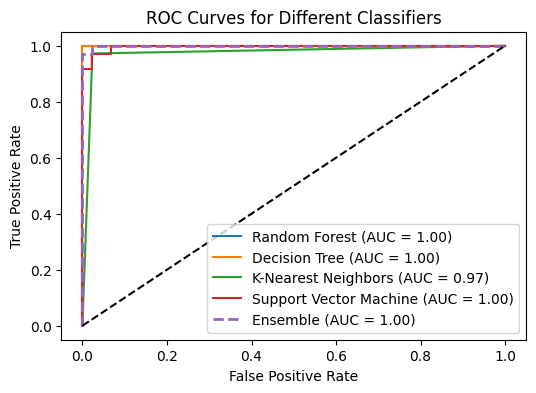

In [ ]:
# prompt: display roc curves for these models

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Assuming X_test, y_test, and the trained models are available from the previous code

# Convert y_test to numerical labels using LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_train)
y_test_bin = lb.transform(y_test)

# Create ROC curves for each model
plt.figure(figsize=(6, 4))

for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)
    # Assuming binary classification, select probabilities for the positive class
    # Adjust the index [:, 1] if your positive class is at a different index
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for the ensemble model
y_pred_prob_ensemble = ensemble_model.predict_proba(X_test)

y_pred_ensemble_positive = y_pred_prob_ensemble[:, 1]

fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(
    y_test_bin, y_pred_ensemble_positive
)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)
plt.plot(fpr_ensemble, tpr_ensemble, label=f'Ensemble (AUC = {roc_auc_ensemble:.2f})', linestyle='--', linewidth=2)


plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')
plt.show()


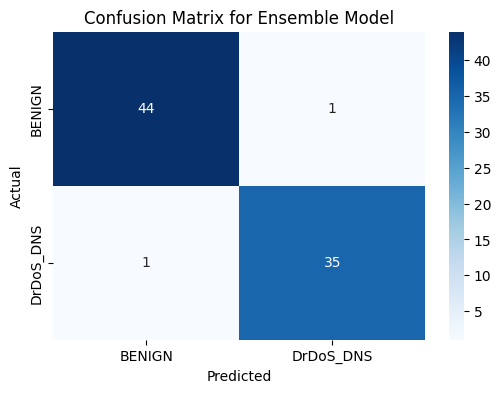

In [ ]:
# prompt: confusion matrix for the ensemble model

import numpy as np
# Assuming ensemble_pred and y_test are defined from the previous code
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, ensemble_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Ensemble Model")
plt.show()


##**4.3 Correlation Matrices**

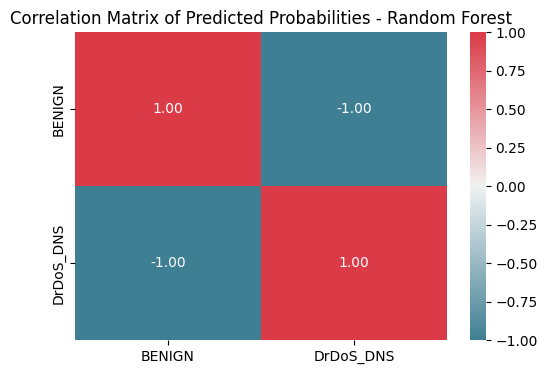

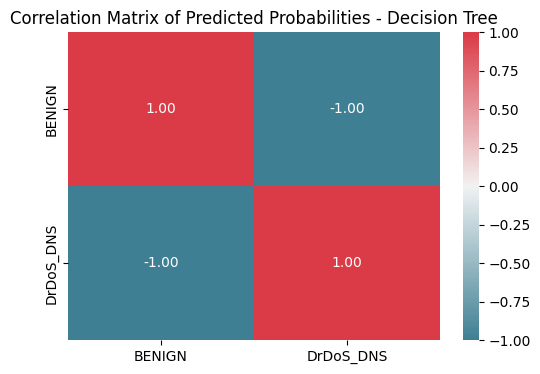

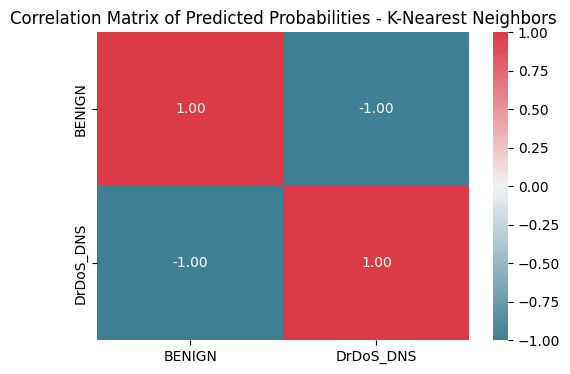

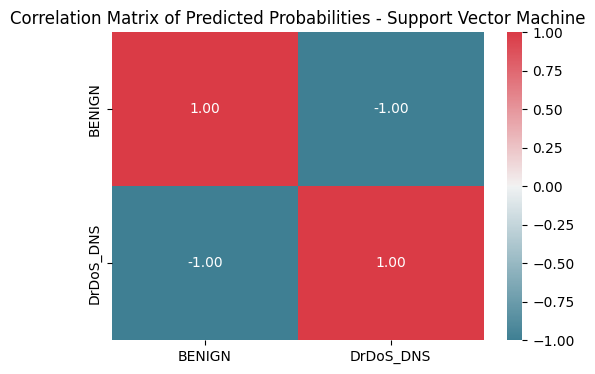

In [ ]:
# prompt: display correlation matrices for each of the models; use green and blue

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'models' dictionary and 'X_test' are defined from the previous code

for name, model in models.items():
    # Predict probabilities for each class
    y_pred_proba = model.predict_proba(X_test)

    # Convert probabilities to DataFrame
    y_pred_proba_df = pd.DataFrame(y_pred_proba, columns=lb.classes_)

    # Calculate correlation matrix
    correlation_matrix = y_pred_proba_df.corr()

    # Plot the correlation matrix with custom colormap
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), center=0, fmt=".2f")
    plt.title(f"Correlation Matrix of Predicted Probabilities - {name}")
    plt.show()


##**4.4 Feature Importance**

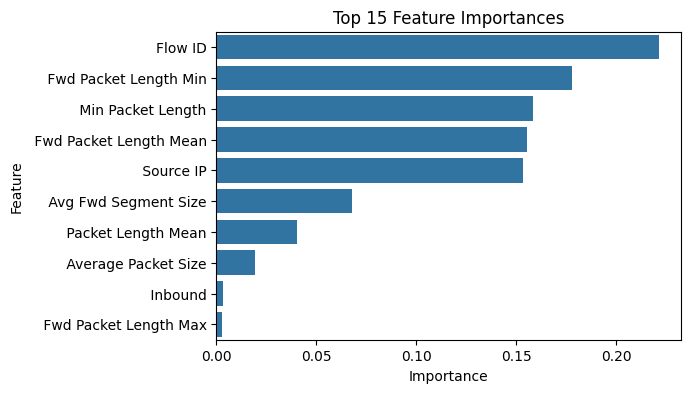

In [ ]:
# prompt: display in a graph feature importance only for 15 variables

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'models' dictionary and 'X_train', 'y_train' are defined from the previous code
# and 'results' list is available
# Example: Access the RandomForestClassifier model
model = models["Random Forest"]


# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Select top 15 features
top_15_features = feature_importances.head(15)

# Create the plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=top_15_features)
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#**5.Deployment**

In [ ]:
# prompt: ensemble model pkl and load

import pickle

# Save the model to a file
filename = 'ensemble_model.pkl'
pickle.dump(ensemble_model, open(filename, 'wb'))

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Use the loaded model to make predictions
# ... (example)
# predictions = loaded_model.predict(X_test)
# print(predictions)


In [ ]:
# prompt: install streamlite

!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

In [ ]:
%%writefile app.py
import streamlit as st

Writing app.py


In [ ]:
!ngrok authtoken 2wVB3iYSDlJmc3a75Nw1QjhEvyQ_5Gxs45H6iBNePyeY35uu2

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install streamlit pyngrok

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import io

st.set_page_config(page_title="Intrusion Detection System", layout="wide")
st.title("🚨 Intrusion Detection System")
st.markdown("This interactive web app uses a machine learning model to detect potential network intrusions.")

# Load default data
@st.cache_data
def load_default_data():
    return pd.DataFrame({
        'feature1': [0, 1, 0, 1],
        'feature2': [1, 0, 1, 0],
        'Label': ['Normal', 'Attack', 'Normal', 'Attack']
    })

# Sidebar file upload
st.sidebar.header("📥 Upload CSV Data")
uploaded_file = st.sidebar.file_uploader("Upload CSV with or without 'Label' column")

# Load data
data = pd.read_csv(uploaded_file) if uploaded_file else load_default_data()

has_label = 'Label' in data.columns

if has_label:
    X = data.drop('Label', axis=1)
    y = data['Label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
else:
    st.warning("No 'Label' column found. The model will use default training data for predictions only.")
    default_data = load_default_data()
    X_train = default_data.drop('Label', axis=1)
    y_train = default_data['Label']
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    X = data  # Use all uploaded data as unlabeled input

# Tabs
tab1, tab2, tab3, tab4 = st.tabs(["📄 View Data", "🧠 Train Model", "🔮 Predict", "📈 Report"])

# Tab 1: View Data
with tab1:
    st.subheader("📄 Uploaded Data Preview")
    st.write(data.head())

    st.markdown("### 🧮 Data Summary")
    st.write(data.describe())

    if has_label:
        st.markdown("### 📊 Label Distribution")
        label_counts = data['Label'].value_counts()
        st.bar_chart(label_counts)

# Tab 2: Model Performance (only for labeled data)
with tab2:
    st.subheader("🧠 Model Performance")
    if has_label:
        accuracy = accuracy_score(y_test, y_pred)
        st.metric("Model Accuracy", f"{accuracy:.2%}")

        st.markdown("### Confusion Matrix")
        cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
        fig, ax = plt.subplots()
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")
        st.pyplot(fig)

        st.markdown("### Classification Report")
        report = classification_report(y_test, y_pred, output_dict=True)
        st.dataframe(pd.DataFrame(report).transpose())
    else:
        st.info("Model performance metrics are only available when your data includes a 'Label' column.")

# Tab 3: Prediction
with tab3:
    st.subheader("🔮 Real-Time Prediction")
    st.write("Use the sliders or inputs below to simulate a real-time scenario.")

    input_data = {}
    for col in X.columns:
        if pd.api.types.is_numeric_dtype(X[col]):
            input_data[col] = st.slider(f"{col}", float(X[col].min()), float(X[col].max()), float(X[col].mean()))
        else:
            input_data[col] = st.text_input(f"{col}", "")

    if st.button("Predict Now"):
        input_df = pd.DataFrame([input_data])
        prediction = model.predict(input_df)[0]
        st.success(f"🛡️ Prediction Result: **{prediction}**")

# Tab 4: Report
with tab4:
    st.subheader("📈 Model Report Summary")
    if has_label:
        buffer = io.StringIO()
        buffer.write("Intrusion Detection Model Report\n\n")
        buffer.write(f"Accuracy: {accuracy:.2%}\n\n")
        buffer.write("Classification Report:\n")
        buffer.write(classification_report(y_test, y_pred))
        st.download_button(
            label="📥 Download Report as .txt",
            data=buffer.getvalue(),
            file_name="intrusion_detection_report.txt",
            mime="text/plain"
        )
    else:
        st.info("No report available as your data lacks labels.")

    st.markdown("You can also [save this page as PDF](https://www.wikihow.com/Save-a-Webpage-as-a-PDF) for documentation.")


Overwriting app.py


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import io

st.set_page_config(page_title="Intrusion Detection System", layout="wide")
st.title("🚨 Intrusion Detection System")
st.markdown("This interactive web app uses a machine learning model to detect potential network intrusions.")

# Load default labeled data
@st.cache_data
def load_default_data():
    return pd.DataFrame({
        'feature1': [0, 1, 0, 1],
        'feature2': [1, 0, 1, 0],
        'Label': ['Normal', 'Attack', 'Normal', 'Attack']
    })

# Sidebar upload
st.sidebar.header("📥 Upload CSV Data")
uploaded_file = st.sidebar.file_uploader("Upload CSV with or without a 'Label' column")

# Load data
data = pd.read_csv(uploaded_file) if uploaded_file else load_default_data()
has_label = 'Label' in data.columns

# Model training
default_data = load_default_data()
X_train = default_data.drop('Label', axis=1)
y_train = default_data['Label']

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# If labeled, prepare test set; else, predict only
if has_label:
    X = data.drop('Label', axis=1)
    y = data['Label']
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
else:
    X = data
    y_pred = model.predict(X)

# Tabs
tab1, tab2, tab3, tab4 = st.tabs(["📄 View Data", "🧠 Train & Predict", "🔮 Real-Time Prediction", "📈 Report"])

# Tab 1: View Data
with tab1:
    st.subheader("📄 Uploaded Data Preview")
    st.write(data.head())

    st.markdown("### 🧮 Data Summary")
    st.write(data.describe())

    if has_label:
        st.markdown("### 📊 Label Distribution")
        st.bar_chart(data['Label'].value_counts())

# Tab 2: Train & Predict
with tab2:
    st.subheader("🧠 Model Prediction Results")

    st.markdown("### 📌 Predicted Labels")
    st.dataframe(pd.DataFrame({'Prediction': y_pred}))

    st.markdown("### 📊 Prediction Distribution")
    pred_dist = pd.Series(y_pred).value_counts()
    st.bar_chart(pred_dist)

    if has_label:
        st.markdown("### ✅ Accuracy")
        st.metric("Model Accuracy", f"{accuracy:.2%}")

        st.markdown("### Confusion Matrix")
        cm = confusion_matrix(y, y_pred, labels=np.unique(y))
        fig, ax = plt.subplots()
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")
        st.pyplot(fig)

        st.markdown("### Classification Report")
        report = classification_report(y, y_pred, output_dict=True)
        st.dataframe(pd.DataFrame(report).transpose())

# Tab 3: Real-Time Prediction
with tab3:
    st.subheader("🔮 Real-Time Input")

    input_data = {}
    for col in X.columns:
        if pd.api.types.is_numeric_dtype(X[col]):
            input_data[col] = st.slider(f"{col}", float(X[col].min()), float(X[col].max()), float(X[col].mean()))
        else:
            input_data[col] = st.text_input(f"{col}", "")

    if st.button("Predict Now"):
        input_df = pd.DataFrame([input_data])
        prediction = model.predict(input_df)[0]
        st.success(f"🛡️ Prediction: **{prediction}**")

# Tab 4: Report Download
with tab4:
    st.subheader("📈 Downloadable Report")

    buffer = io.StringIO()
    buffer.write("Intrusion Detection Report\n\n")
    if has_label:
        buffer.write(f"Accuracy: {accuracy:.2%}\n\n")
        buffer.write("Classification Report:\n")
        buffer.write(classification_report(y, y_pred))
    else:
        pred_counts = pd.Series(y_pred).value_counts()
        buffer.write("Prediction Summary (Unlabeled Data):\n")
        buffer.write(pred_counts.to_string())

    st.download_button(
        label="📥 Download Report as .txt",
        data=buffer.getvalue(),
        file_name="intrusion_detection_report.txt",
        mime="text/plain"
    )

    st.markdown("You can also [save this page as PDF](https://www.wikihow.com/Save-a-Webpage-as-a-PDF).")


Overwriting app.py


In [ ]:
from pyngrok import ngrok

# Set your ngrok authtoken (get from https://dashboard.ngrok.com/)
!ngrok authtoken 2wVB3iYSDlJmc3a75Nw1QjhEvyQ_5Gxs45H6iBNePyeY35uu2

# Run Streamlit in background
get_ipython().system_raw('streamlit run app.py &')

# Setup ngrok tunnel
public_url = ngrok.connect(addr='8501')
print("✨ Streamlit App Running at:", public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
✨ Streamlit App Running at: NgrokTunnel: "https://f78f-34-106-156-219.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
from pyngrok import ngrok

# List active tunnels
!ngrok tunnels list

# Kill specific tunnels if needed
!ngrok tunnels kill <tunnel_id>  # Replace with actual tunnel ID

# Disconnect and re-authenticate
ngrok.disconnect(public_url.public_url)
!ngrok authtoken 2wVB3iYSDlJmc3a75Nw1QjhEvyQ_5Gxs45H6iBNePyeY35uu2

# Run Streamlit in background
get_ipython().system_raw('streamlit run app.py &')

# Setup ngrok tunnel
public_url = ngrok.connect(addr='8501')
print("✨ Streamlit App Running at:", public_url)

ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --url baz.ngrok.dev 8080                           # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --url mydomain.com                              # run ngrok with your own custom domain
  ngrok http 80 --cidr-allow 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions
  Upgrade your account at https://dash

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
✨ Streamlit App Running at: NgrokTunnel: "https://a030-34-106-156-219.ngrok-free.app" -> "http://localhost:8501"
